In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

Text(0.5, 1.0, 'SEIRP')

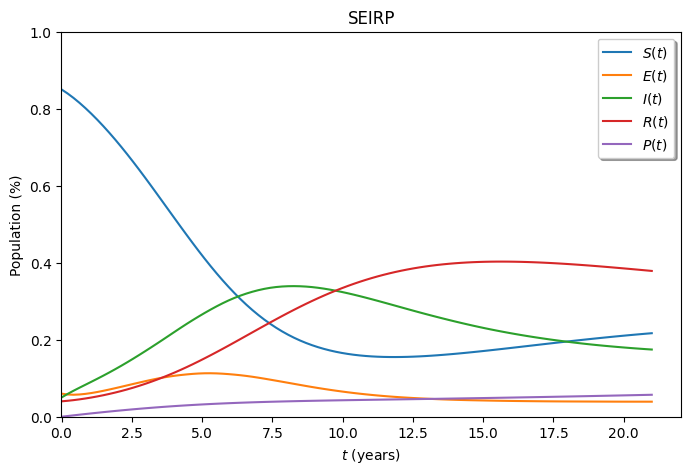

In [ ]:
# System of differential equations
def seirp(t, y, beta, alpha, sigma, gamma, mu, rho, nu, Lambda):
    S, E, I, R, P = y
    return [
        Lambda - beta * S * I - alpha * S + rho * R - nu * S,
        beta * S * I - sigma * E - nu * E,
        sigma * E - gamma * I - mu * I - nu * I,
        gamma * I - rho * R - nu * R,
        alpha * S - nu * P
    ]

# Initial values & parameter values
t_initial, t_final = 0, 21
S0, E0, I0, R0, P0 = 0.85, 0.06, 0.05, 0.04, 0.00
beta = 0.99
alpha = 0.01
sigma = 0.95
gamma = 0.20
mu = 0.03
rho = 0.10
nu = 0.01
Lambda = 0.01
Y0 = [S0, E0, I0, R0, P0]
t_span = (t_initial, t_final)

# Solve system of equations
sol = solve_ivp(seirp, t_span, Y0, args=(beta, alpha, sigma, gamma, mu, rho, nu, Lambda), dense_output=True)
t = np.linspace(t_initial, t_final, 100)
y = sol.sol(t)

# Plot compartment populations over time
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(t, y.T, label=["$S(t)$", "$E(t)$", "$I(t)$", "$R(t)$", "$P(t)$"])
ax.legend(shadow=True)
ax.set_xlim(left=-0.01)
ax.set_ylim(0, 1)
ax.set_xlabel("$t$ (years)")
ax.set_ylabel("Population (%)")
ax.set_title("SEIRP")